# week 10 information theory.

In [1]:
print("Hello,world")


Hello,world


In [2]:
import zlib #also izma

text = "here is some text some text text text with repition"
print(f"orginal text {len(text)} bytes:", text)

text_bytes = text.encode('ascii')
comp = zlib.compress(text_bytes)
print(f"compressed text {len(comp)} bytes:", comp)

decomp = zlib.decompress(comp)
print("decompressed text:", decomp.decode('ascii'))

ratio = len(comp) / len(text_bytes)
print(f"compression ration: {ratio:.2f}")


orginal text 51 bytes: here is some text some text text text with repition
compressed text 41 bytes: b'x\x9c\xcbH-JU\xc8,V(\xce\xcfMU(I\xad(Ab!\x88\xf2\xcc\x92\x0c\x85\xa2\xd4\x82\xcc\x92\xcc\xfc<\x00\xebX\x13C'
decompressed text: here is some text some text text text with repition
compression ration: 0.80


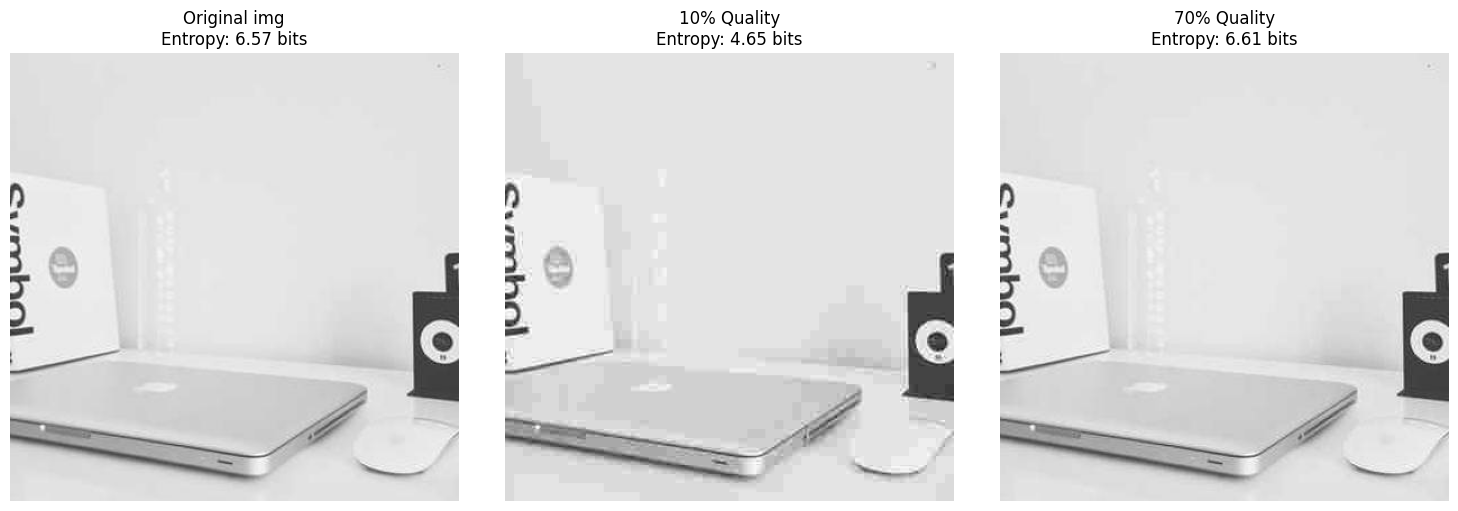

In [3]:
import requests 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from io import BytesIO

def entropy(img):
    histogram = img.histogram()
    probs = [float(h)/ sum(histogram) for h in histogram]
    return -sum(p * np.log2(p) for p in probs if p != 0) 

def compress(img, quality=75):
    fname = f'../images/q_{quality}.jpg'
    img.save(fname, 'JPEG', quality=quality)
    compressed = Image.open(fname)
    return compressed, entropy(compressed)

url = 'https://picsum.photos/400/400'
response = requests.get(url)
original = Image.open(BytesIO(response.content))

qualities = [10, 70]
images = [original]
entropies = [entropy(original)]
titles = ['Original img']
for q in qualities:
    img_c, img_h = compress(original, q)
    images.append(img_c)
    entropies.append(img_h)
    titles.append(f'{q}% Quality')

plt.figure(figsize=(15,5))
for lcv, (img, ent, title) in enumerate(zip(images,entropies,titles),start=1):
    plt.subplot(1, len(images), lcv)
    plt.imshow(img)
    plt.title(f"{title}\nEntropy: {ent:.2f} bits")
    plt.axis('off')

plt.tight_layout()
plt.show()


Week 11

In [4]:
%pip install faker tqdm -q
from tqdm import tqdm
from queue import Queue
from faker import Faker
from time import time, sleep



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#11/12/2024
class Device:
    def __init__(self,name):
        self.ip = ""
        self.name = name
        self.inbox = Queue()
    
    def send(self, recip, msg):
        print(f"{self.name} is sending {len(msg)} bytes to {recip.ip}")
        for _ in tqdm(range(len(msg)), desc = "Sending", ncols=100):
            sleep(0.25) # ~32 bits/s
        recip.inbox.put(msg.encode('ascii'))

    def receive(self):
        if not self.inbox.empty():
            msg = self.inbox.get().decode('ascii')
            print(f"{self.name} received a message: {msg}")
            return len(msg)
        return 0


In [6]:
class Network:
    def __init__(self):
        self.devices = []
        self.dhcp = Faker()
        self.start_time = time()
        self.usage = 0

    def add_device(self, device:  Device):
        device.ip = self.dhcp.ipv4()
        self.devices.append(device)

    def sim_traffic(self):
        for device in self.devices:
            self.usage += device.receive()

    def display(self):
        print(f"Uptime: {time()- self.start_time:.4} seconds")
        print(f"data Usage: {self.usage} bytes")
        print("Connected devices:")
        for d in self.devices:
            print(f"{d.name}\t\t{d.ip}")

In [7]:
alice = Device("Alice")
bob = Device("Bob")

network = Network()
network.add_device(alice)
network.add_device(bob)

while True:
    sender_name = input("Who are you (Alice/Bob)")
    if sender_name == "Alice":
        sender, recip = alice, bob
    elif sender_name == "Bob":
        sender, recip = bob, alice
    else:
        print("Invalid name")
        continue

    msg = input("Enter your message: ")
    sender.send(recip,msg)
    network.sim_traffic()

    loop = input("Do you want to send another messgae (y/n)")
    if loop not in "yes":
        break
    


network.display()

Alice is sending 22 bytes to 14.40.27.216


Sending: 100%|██████████████████████████████████████████████████████| 22/22 [00:05<00:00,  3.98it/s]


Bob received a message: LDSKJFLKDJFLDS:FJLKDFJ
Uptime: 19.9 seconds
data Usage: 22 bytes
Connected devices:
Alice		45.160.130.134
Bob		14.40.27.216
